# This project explores statistical arbitage in cryptocurrencies.

### Statistical arbitage (stat-arb) is a quantitative trading strategy based on mathematical and statistical models, to find patterns in price movements and profits from temporary mispricing.

### Cryptocurrencies are digital assets that use cryptography and blockchain technology to secure transactions and control supply.

### Crypto markets are less efficient, noisy and fast movie. Therefore stat-arb is a great way to find patterns in the price movements and profit through momentum / reversal.

In [ ]:
# =========================
# Crypto Stat-Arb (yfinance) — Daily, Thresholded, Costs
# =========================

**Library installations**

In [ ]:
!pip install yfinance pandas numpy matplotlib --quiet


In [ ]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["axes.grid"] = True

#### Now we will download the Bitcoin (BTC) daily price data for the last 5 years time. The data will have Open, High, Low, Close, Volume (OHLCV) prices of BTC.

In [ ]:

# ---------- 1) Download & prepare data (Daily, 5y) ----------
btc = yf.download("BTC-USD", interval="1d", period="5y", group_by="ticker")
# Flatten any multiindex columns and standardize names
btc.columns = [c[1] if isinstance(c, tuple) else c for c in btc.columns]
btc = btc.rename(columns=str.lower)
btc["ret1"] = btc["close"].pct_change()
btc = btc.dropna()

# Benchmark (buy & hold BTC)
bench = btc["ret1"]

### Let us visualize our data first.

In [ ]:


# Price chart
btc["close"].plot(figsize=(6,4), title="BTC-USD Daily Close (5 Years)")
plt.ylabel("Price (USD)")
plt.show()

# Daily returns histogram
btc["ret1"].hist(bins=50, figsize=(6,4))
plt.title("Histogram of Daily Returns")
plt.xlabel("Return")
plt.show()


In the price chart, we see there is a big bloom and bust in 2021-2023. The daily close prices goes as high as ~70k and then crashes to ~15k. The prices then face accumulation phase during 2023, and rise up in 2024- present. Prices even reach ~100k during 2025. This followns bloom-bust cycle. Therefore momentum may work during the bloom and reversal may work during the crash.

The histogram shows assymetry following high downside shocks.

# Some importane definitions required for the rest of the notebook.

### Returns : How much an asset has changed with respect to past.
$  r_t = \frac{P_t-P_{t-1}}{P_{t-1}} = ln(\frac{P_t}{P_{t-1}}) $
### Momentum : Assests that go up tend to keep go up, that go down tend to keep go down. The mathematical formuls is given by.

$ M_t(k) = \frac{P_t}{P_{t-k}}-1$

k-day return, if it is positive that means this is bullish momentum.

### Reversal : Tendency of asset that went up a lot to come down and vice versa.
$ R_t(k) = - M_t(k)$




In [ ]:

# ---------- 2) Helpers ----------
def zscore(x: pd.Series, w: int):
    mu = x.rolling(w, min_periods=w).mean()
    sd = x.rolling(w, min_periods=w).std()
    return (x - mu) / sd

This zscore normalize the returns.

Below we create a function to convert the raw price data inot trading decision. It first finds the return from last k days, then normalize it to check if the mode in price is valubale. Based on this it decides the sign of the return positive of negative to decide whether to momentum or reversal. It also clraifies if some part of the signal should be consider as noise

This backtest does not explicitely contain any holding period. It has a hold for 1 bar i.e. 1 day.

### Next we will try different Reversal strategies such as Reversal with Uninformed trading,  Correlation Reversal and  Macro/Vol Regime Filtered Reversal.

#### Reversal with Uninformed Trading : If trading volume is low, price moves are tend to reversal more. This is implemented by taking reversal signal only when it is below z score mean or a chosen quantile.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is i

/tmp/ipython-input-3975607220.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, interval="1d", period="5y", group_by="ticker", progress=False)
/tmp/ipython-input-3975607220.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, interval="1d", period="5y", group_by="ticker", progress=False)
/tmp/ipython-input-3975607220.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, interval="1d", period="5y", group_by="ticker", progress=False)



=== Uninformed Reversal (stronger) (Top 10) ===
     AnnRet  AnnVol  Sharpe   MaxDD   Alpha    Beta  Turnover  \
128  0.1704  0.3553  0.4796 -0.4154  0.1488  0.0332    0.0197   
131  0.1704  0.3553  0.4796 -0.4154  0.1488  0.0332    0.0197   
134  0.1704  0.3553  0.4796 -0.4154  0.1488  0.0332    0.0197   
146  0.1555  0.3602  0.4316 -0.3942  0.1331  0.0345    0.0186   
149  0.1555  0.3602  0.4316 -0.3942  0.1331  0.0345    0.0186   
152  0.1555  0.3602  0.4316 -0.3942  0.1331  0.0345    0.0186   
199  0.1267  0.3328  0.3808 -0.4341  0.0887  0.0586    0.0537   
202  0.1267  0.3328  0.3808 -0.4341  0.0887  0.0586    0.0537   
204  0.1267  0.3328  0.3808 -0.4341  0.0887  0.0586    0.0537   
205  0.1267  0.3328  0.3808 -0.4341  0.0887  0.0586    0.0537   

                    Mode  Lookback  Hold VolFilter  ZThresh  ShockZ  Order  
128  Uninformed Reversal        10     3    z_lt_0      0.0     1.5  limit  
131  Uninformed Reversal        10     3    z_lt_0      0.5     1.5  limit  
134 

/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:247: FutureWarning: Ser


=== Pairs Reversal (hedged) — ETH vs BTC (Top 10) ===
    AnnRet  AnnVol  Sharpe   MaxDD   Alpha    Beta  Turnover  \
30 -0.0267  0.2252 -0.1187 -0.5146 -0.0597  0.0405    0.0104   
15 -0.0272  0.2186 -0.1246 -0.5366 -0.0621  0.0427    0.0290   
24 -0.0364  0.2175 -0.1674 -0.5285 -0.0457  0.0114    0.0126   
32 -0.0472  0.2229 -0.2115 -0.5181 -0.0799  0.0401    0.0104   
26 -0.0476  0.2175 -0.2188 -0.5407 -0.0547  0.0088    0.0115   
25 -0.0501  0.2174 -0.2304 -0.5401 -0.0577  0.0094    0.0126   
29 -0.0502  0.2171 -0.2311 -0.5470 -0.0805  0.0372    0.0181   
31 -0.0520  0.2234 -0.2327 -0.5245 -0.0848  0.0402    0.0104   
16 -0.0516  0.2179 -0.2369 -0.5894 -0.0863  0.0425    0.0203   
28 -0.0572  0.2176 -0.2631 -0.5517 -0.0882  0.0379    0.0225   

                           Mode  BetaSpan  ZEntry  ZExit  Hold  Order  
30  Pairs Reversal (ETH vs BTC)       120     1.0    0.2     1  limit  
15  Pairs Reversal (ETH vs BTC)        90     0.5    0.5     1  limit  
24  Pairs Reversal (ETH 

/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
/tmp/ipython-input-397560722


=== Reversal — Macro/Vol (stronger) (Top 10) ===
     AnnRet  AnnVol  Sharpe   MaxDD   Alpha    Beta  Turnover            Mode  \
19   0.4199  0.4356  0.9639 -0.3473  0.4318 -0.0183    0.0559  Reversal-Macro   
31   0.3424  0.3729  0.9183 -0.3512  0.3389  0.0054    0.0427  Reversal-Macro   
25   0.3219  0.3691  0.8720 -0.3765  0.3193  0.0039    0.0526  Reversal-Macro   
55   0.2635  0.3754  0.7018 -0.4198  0.2590  0.0069    0.0559  Reversal-Macro   
205  0.2337  0.3439  0.6795 -0.3456  0.2155  0.0280    0.0394  Reversal-Macro   
13   0.2663  0.3931  0.6775 -0.3701  0.2680 -0.0026    0.0756  Reversal-Macro   
103  0.2434  0.3779  0.6440 -0.3818  0.2368  0.0101    0.0372  Reversal-Macro   
49   0.2322  0.3693  0.6287 -0.4630  0.2275  0.0073    0.0745  Reversal-Macro   
211  0.2072  0.3343  0.6197 -0.3653  0.1770  0.0464    0.0318  Reversal-Macro   
91   0.2654  0.4350  0.6100 -0.3769  0.2599  0.0083    0.0526  Reversal-Macro   

     Lookback  RVwin  RVz  ZThresh  DispZ  Hold  Order  
1

/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)


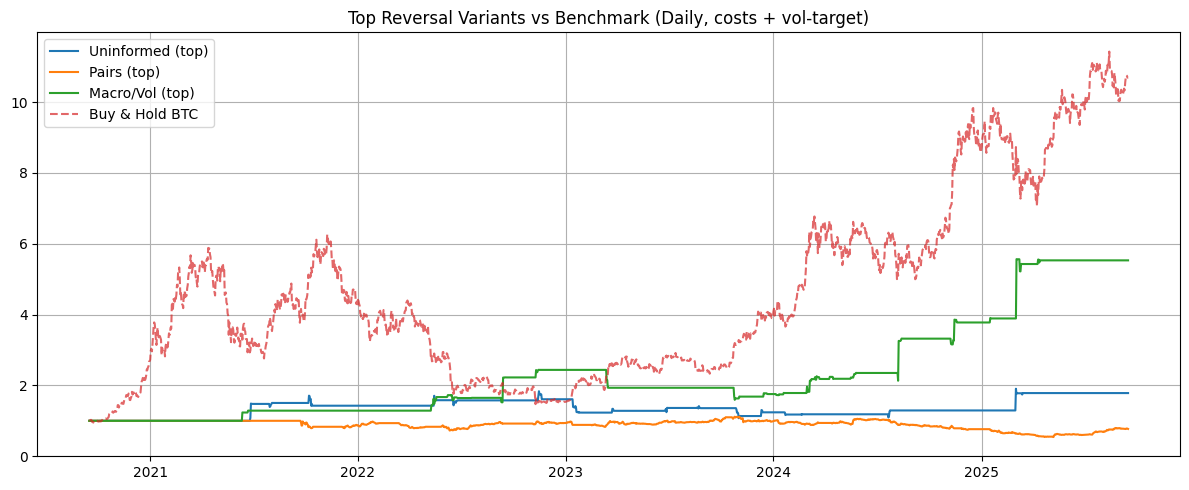

/tmp/ipython-input-3975607220.py:247: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)
/tmp/ipython-input-3975607220.py:325: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
/tmp/ipython-input-3975607220.py:537: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return w.shift(1).fillna(method="ffill").fillna(1.0/len(R.columns))



=== FINAL RESULTS (Costs + vol-target) ===
Reversal — Uninformed        | Sharpe  0.48 | AnnRet  17.04% | MaxDD -41.54% | Alpha  14.88% | Beta  0.03 | Turnover 0.076
Reversal — Pairs(ETH|BTC)    | Sharpe -0.12 | AnnRet  -2.67% | MaxDD -51.46% | Alpha  -5.97% | Beta  0.04 | Turnover 0.655
Reversal — Macro/Vol         | Sharpe  0.96 | AnnRet  41.99% | MaxDD -34.73% | Alpha  43.18% | Beta -0.02 | Turnover 0.098

=== Combos ===
Equal-weight combo           | Sharpe  0.95 | AnnRet  18.79% | MaxDD -22.95% | Alpha  18.28% | Beta  0.01 | Turnover 0.704
Inv-vol combo                | Sharpe  0.60 | AnnRet  18.71% | MaxDD -39.78% | Alpha  17.14% | Beta  0.02 | Turnover 0.701


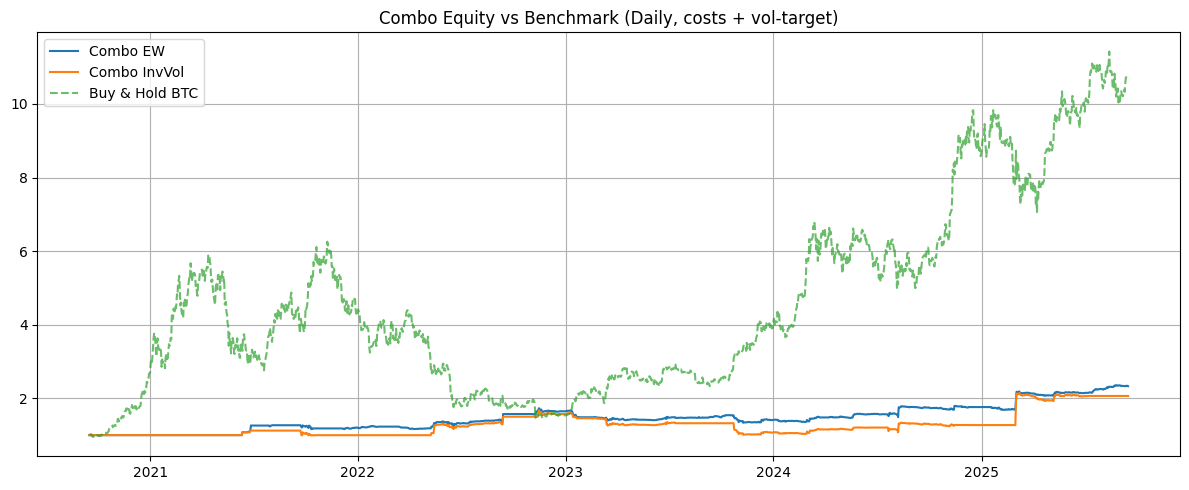

In [1]:
# ===============================================================
# Crypto Stat-Arb (yfinance): Reversal Extensions (Stronger)
# - Uninformed (volume + shock filters, hold, thresholds)
# - Correlation Pairs (true hedged PnL, threshold, hold, EMA beta)
# - Macro/Vol regime (RV + dispersion filters, hold, thresholds)
# Includes: vol targeting, cost sensitivity, inverse-vol combo
# ===============================================================

!pip -q install yfinance pandas numpy matplotlib statsmodels --upgrade

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["axes.grid"] = True

# ------------------ 0) Download & Prepare Data (Daily, 5y) ------------------
TICKERS = ["BTC-USD", "ETH-USD", "SOL-USD"]
dfs = {}
for t in TICKERS:
    df = yf.download(t, interval="1d", period="5y", group_by="ticker", progress=False)
    df.columns = [c[1] if isinstance(c, tuple) else c for c in df.columns]
    df = df.rename(columns=str.lower)
    df["ret1"] = df["close"].pct_change()
    df = df.dropna()
    dfs[t] = df

btc = dfs["BTC-USD"]
bench = btc["ret1"]  # benchmark = BTC buy&hold

# --------------------------- 1) Helpers / Metrics ----------------------------
def zscore(x: pd.Series, w: int):
    mu = x.rolling(w, min_periods=w).mean()
    sd = x.rolling(w, min_periods=w).std()
    return (x - mu) / sd

def realized_vol(ret: pd.Series, w: int):
    return ret.rolling(w, min_periods=w).std()

def dispersion_from(dfs_dict, col="ret1"):
    """Cross-sectional dispersion across provided assets (same dates)."""
    R = pd.concat({k: v[col] for k,v in dfs_dict.items()}, axis=1).dropna()
    return R.std(axis=1)

def apply_hold(pos: pd.Series, hold: int):
    """Forward-fill nonzero positions up to 'hold' days."""
    if hold <= 1:
        return pos
    # Replace 0 with NaN then ffill with limit=hold-1 so an entry is held for up to H days
    return pos.replace(0, np.nan).ffill(limit=hold-1).fillna(0)

def vol_target(returns: pd.Series, target_vol=None, lookback=60, eps=1e-12):
    """
    Scale daily returns to hit target_vol (ann). target_vol in annualized units, e.g. 0.2 = 20%.
    If None, returns unchanged. Uses rolling realized vol to compute scale.
    """
    if target_vol is None:
        return returns
    # convert ann target to daily target
    daily_t = target_vol / math.sqrt(365)
    roll = returns.rolling(lookback, min_periods=lookback).std()
    scale = (daily_t / (roll + eps)).clip(upper=5.0)  # cap extreme scaling
    return returns * scale.shift(1).fillna(1.0)

def perf_from_strat(strat: pd.Series, bench: pd.Series, label=None, freq=365):
    ann_ret = strat.mean()*freq
    ann_vol = strat.std(ddof=0)*math.sqrt(freq)
    sharpe  = 0 if ann_vol==0 else ann_ret/ann_vol
    eq = (1+strat).cumprod()
    mdd = (eq/eq.cummax()-1).min()
    b = bench.reindex(strat.index).fillna(0)
    cov = np.cov(strat, b)[0,1]
    var_b = np.var(b)
    beta = 0 if var_b==0 else cov/var_b
    alpha = (strat - beta*b).mean()*freq
    # daily turnover proxy
    pos = np.sign(strat).shift(1).fillna(0)
    turnover = pos.diff().abs().mean()
    return {"Label":label, "AnnRet":ann_ret, "AnnVol":ann_vol, "Sharpe":sharpe,
            "MaxDD":mdd, "Alpha":alpha, "Beta":beta, "Turnover":turnover}

def print_table(df, title, n=10):
    df2 = df.sort_values(["Sharpe","AnnRet"], ascending=[False,False]).head(n).round(4)
    print(f"\n=== {title} (Top {n}) ===")
    print(df2)
    return df2

# ---------------- 2) Uninformed Reversal (stronger) --------------------------
def uninformed_signal(close, volume, k=5, z_win=252,
                      vol_filter="z_lt_0", vol_q=0.4,
                      r_shock_z=None, z_thresh=0.0):
    """
    base = reversal on k-day return (z-scored)
    Filters:
      - vol_filter in {"z_lt_0","q_lt","none"}
      - r_shock_z: only trade if |k-day return z| >= r_shock_z (optional)
      - z_thresh : require |z(lb_ret)| >= z_thresh
    """
    lb = close.pct_change(k)
    z_lb = zscore(lb, z_win)
    base = -np.sign(z_lb).where(z_lb.notna(), 0)  # reversal
    # entry threshold on move size (stronger signal only)
    if z_thresh > 0:
        base = base.where(z_lb.abs() >= z_thresh, 0)

    # "uninformed" = low activity filter
    if vol_filter == "z_lt_0":
        vol_z = zscore(volume, 252)
        filt = (vol_z < 0).astype(int)
    elif vol_filter == "q_lt":
        q = volume.rank(pct=True)
        filt = (q < vol_q).astype(int)
    else:
        filt = pd.Series(1, index=close.index)

    sig = base * filt

    # Optional big shock gate: reversal works after strong moves
    if r_shock_z is not None:
        shock = (z_lb.abs() >= r_shock_z).astype(int)
        sig = sig * shock

    return sig

def backtest_unconstrained(prices_df, side,
                           hold=1,
                           order_type="limit",
                           leverage=1.0,
                           target_vol=None,  # e.g., 0.2 for 20% ann vol
                           vt_lookback=60):
    """
    Single-asset backtest with hold, costs, and optional vol-targeting.
    """
    # position with one-bar delay
    pos = side.reindex(prices_df.index).fillna(0).shift(1).fillna(0)
    pos = apply_hold(pos, hold)
    ret = prices_df["ret1"].fillna(0)
    gross = pos * ret * leverage

    # costs on |Δpos|
    cost_rate = 0.002 if order_type == "market" else 0.0007
    turnover = pos.diff().abs().fillna(abs(pos).iloc[0])
    costs = -cost_rate * turnover

    strat = gross + costs
    # vol target (optional)
    strat = vol_target(strat, target_vol=target_vol, lookback=vt_lookback)

    eq = (1 + strat).cumprod()
    # Metrics
    freq = 365
    ann_ret = strat.mean() * freq
    ann_vol = strat.std(ddof=0) * math.sqrt(freq)
    sharpe  = 0.0 if ann_vol==0 else ann_ret / ann_vol
    mdd = (eq/eq.cummax() - 1).min()

    bench = prices_df["ret1"].reindex(strat.index).fillna(0)
    cov = np.cov(strat, bench)[0,1]
    var_b = np.var(bench)
    beta = 0.0 if var_b == 0 else cov/var_b
    alpha = (strat - beta*bench).mean() * freq

    stats = {"AnnRet":ann_ret, "AnnVol":ann_vol, "Sharpe":sharpe,
             "MaxDD":mdd, "Alpha":alpha, "Beta":beta,
             "Turnover": float(turnover.mean())}
    return pos, turnover, strat, eq, stats

def run_uninformed_grid(prices_df,
                        ks=(3,5,10,20),
                        holds=(1,3,5),
                        vol_filters=("z_lt_0","q_lt"),
                        z_thresholds=(0.0, 0.5, 1.0),
                        shock_zs=(None, 1.0, 1.5),
                        order_type="limit",
                        target_vol=0.2):
    rows, curves = [], {}
    for k in ks:
        for h in holds:
            for vf in vol_filters:
                for zt in z_thresholds:
                    for rz in shock_zs:
                        side = uninformed_signal(prices_df["close"], prices_df["volume"],
                                                 k=k, vol_filter=vf, z_thresh=zt, r_shock_z=rz)
                        _, _, strat, eq, st = backtest_unconstrained(
                            prices_df, side, hold=h, order_type=order_type, target_vol=target_vol
                        )
                        st.update({"Mode":"Uninformed Reversal","Lookback":k,"Hold":h,
                                   "VolFilter":vf,"ZThresh":zt,"ShockZ":rz,"Order":order_type})
                        rows.append(st)
                        curves[(k,h,vf,zt,rz)] = eq
    table = pd.DataFrame(rows).sort_values(["Sharpe","AnnRet"], ascending=[False,False])
    print_table(table, "Uninformed Reversal (stronger)", n=10)
    return table, curves

# ---------------- 3) Correlation Pairs Reversal (stronger) -------------------
def ema_beta(series, span):
    return series.ewm(span=span, min_periods=span).mean()

def pairs_spread_and_beta(dfA, dfB, beta_span=60):
    """
    Use rolling EMA beta of log prices: beta_t = Cov(logA, logB)/Var(logB) on an EMA basis.
    """
    LA, LB = np.log(dfA["close"]), np.log(dfB["close"])
    # approximate EMA covariance/variance via differences of EMAs:
    # Using returns for more stability
    rA, rB = LA.diff(), LB.diff()
    ema_rB2 = ema_beta(rB.pow(2), span=beta_span)
    ema_cov = ema_beta(rA*rB,     span=beta_span)
    beta = (ema_cov / ema_rB2).replace([np.inf,-np.inf], np.nan)
    spread = LA - beta*LB
    return spread, beta

def pairs_backtest(dfA, dfB, beta_span=60, z_win=252,
                   z_entry=0.5, z_exit=0.2, hold=1,
                   order_type="limit", target_vol=0.2):
    """
    Build spread = logA - beta*logB; signal = -sign(z(spread)).
    Hysteresis: enter when |z| >= z_entry, flatten when |z| <= z_exit.
    True hedged PnL approx: position * (retA - beta*retB).
    """
    spread, beta = pairs_spread_and_beta(dfA, dfB, beta_span=beta_span)
    z = zscore(spread, z_win)
    # raw side from reversal
    raw = -np.sign(z).where(z.notna(), 0)

    # hysteresis state machine
    side = pd.Series(0, index=z.index, dtype=float)
    active = 0.0
    for t in z.index:
        if active == 0:
            if abs(z.loc[t]) >= z_entry:
                active = raw.loc[t]
        else:
            if abs(z.loc[t]) <= z_exit:
                active = 0.0
        side.loc[t] = active

    # delay & hold
    side = side.shift(1).fillna(0)
    side = apply_hold(side, hold)

    rA = dfA["ret1"].reindex(side.index).fillna(0)
    rB = dfB["ret1"].reindex(side.index).fillna(0)
    b  = beta.reindex(side.index).fillna(method="ffill").fillna(0)

    # hedged return (approx): ret_pair = side * (rA - b*rB)
    gross = side * (rA - b*rB)

    # costs: |Δside| on A leg + small rebalance cost on hedge leg (rebeta)
    cost_rate = 0.002 if order_type=="market" else 0.0007
    turn_side = side.diff().abs().fillna(abs(side).iloc[0])
    # re-hedge turnover: changes in beta while in position
    rehedge = (b.diff().abs().fillna(0) * side.abs()).clip(upper=0.5)  # conservative cap
    costs = -cost_rate*(turn_side + 0.5*rehedge)  # 50% weight on hedge cost

    strat = gross + costs
    strat = vol_target(strat, target_vol=target_vol, lookback=60)
    eq = (1+strat).cumprod()

    # stats vs A as the reporting asset
    freq = 365
    ann_ret = strat.mean()*freq
    ann_vol = strat.std(ddof=0)*math.sqrt(freq)
    sharpe  = 0 if ann_vol==0 else ann_ret/ann_vol
    mdd = (eq/eq.cummax()-1).min()

    benchA = rA
    cov = np.cov(strat, benchA)[0,1]
    var_b = np.var(benchA)
    beta_rep = 0 if var_b==0 else cov/var_b
    alpha = (strat - beta_rep*benchA).mean()*freq

    stats = {"AnnRet":ann_ret, "AnnVol":ann_vol, "Sharpe":sharpe,
             "MaxDD":mdd, "Alpha":alpha, "Beta":beta_rep,
             "Turnover": float(turn_side.mean())}
    return side, strat, eq, stats

def run_pairs_grid(dfA, dfB,
                   beta_spans=(60, 90, 120),
                   z_entries=(0.5, 1.0),
                   z_exits=(0.2, 0.5),
                   holds=(1,3,5),
                   order_type="limit",
                   target_vol=0.2):
    rows, curves = [], {}
    for bs in beta_spans:
        for ze in z_entries:
            for zx in z_exits:
                for h in holds:
                    side, strat, eq, st = pairs_backtest(dfA, dfB,
                                                         beta_span=bs, z_entry=ze, z_exit=zx,
                                                         hold=h, order_type=order_type,
                                                         target_vol=target_vol)
                    st.update({"Mode":"Pairs Reversal (ETH vs BTC)","BetaSpan":bs,
                               "ZEntry":ze,"ZExit":zx,"Hold":h,"Order":order_type})
                    rows.append(st)
                    curves[(bs,ze,zx,h)] = eq
    table = pd.DataFrame(rows).sort_values(["Sharpe","AnnRet"], ascending=[False,False])
    print_table(table, "Pairs Reversal (hedged) — ETH vs BTC", n=10)
    return table, curves

# ---------------- 4) Macro/Vol Regime Reversal (stronger) --------------------
def macro_signal(prices_df, k=5,
                 rv_win=10, rv_z_thresh=0.5,
                 disp=None, disp_z_thresh=None,
                 z_win=252, z_thresh=0.0):
    """
    base reversal on k-day z-return; trade only when realized-vol z >= rv_z_thresh
    Optional: add cross-sectional dispersion filter (disp provided externally)
    """
    lb = prices_df["close"].pct_change(k)
    z_lb = zscore(lb, z_win)
    base = -np.sign(z_lb).where(z_lb.notna(), 0)
    if z_thresh > 0:
        base = base.where(z_lb.abs() >= z_thresh, 0)

    rv = realized_vol(prices_df["ret1"], rv_win)
    rv_z = zscore(rv, 252)
    filt = (rv_z >= rv_z_thresh).astype(int)

    if (disp is not None) and (disp_z_thresh is not None):
        disp_z = zscore(disp.reindex(base.index).fillna(method="ffill"), 252)
        filt = (filt & (disp_z >= disp_z_thresh)).astype(int)

    return base * filt

def run_macro_grid(prices_df, dfs_dict,
                   ks=(3,5,10,20),
                   rv_wins=(10,20),
                   rv_z_th=(0.0, 0.5, 1.0),
                   z_thresholds=(0.0, 0.5),
                   disp_gate=(None, 0.5),   # None = off, else use >= this z
                   holds=(1,3,5),
                   order_type="limit",
                   target_vol=0.2):
    rows, curves = [], {}
    disp = dispersion_from(dfs_dict)  # cross-asset dispersion (BTC,ETH,SOL)
    for k in ks:
        for w in rv_wins:
            for rvz in rv_z_th:
                for zt in z_thresholds:
                    for h in holds:
                        # with and without dispersion filter
                        for dg in disp_gate:
                            side = macro_signal(prices_df, k=k,
                                                rv_win=w, rv_z_thresh=rvz,
                                                disp=disp if dg is not None else None,
                                                disp_z_thresh=dg if dg is not None else None,
                                                z_thresh=zt)
                            _, _, strat, eq, st = backtest_unconstrained(
                                prices_df, side, hold=h, order_type=order_type, target_vol=target_vol
                            )
                            st.update({"Mode":"Reversal-Macro","Lookback":k,"RVwin":w,"RVz":rvz,
                                       "ZThresh":zt,"DispZ":dg,"Hold":h,"Order":order_type})
                            rows.append(st)
                            curves[(k,w,rvz,zt,dg,h)] = eq
    table = pd.DataFrame(rows).sort_values(["Sharpe","AnnRet"], ascending=[False,False])
    print_table(table, "Reversal — Macro/Vol (stronger)", n=10)
    return table, curves

# ============================ 5) RUN ALL GRIDS ===============================
uninformed_table, uninformed_curves = run_uninformed_grid(
    btc,
    ks=(3,5,10,20),
    holds=(1,3,5),
    vol_filters=("z_lt_0","q_lt"),
    z_thresholds=(0.0, 0.5, 1.0),
    shock_zs=(None, 1.0, 1.5),
    order_type="limit",
    target_vol=0.20
)

pairs_table, pairs_curves = run_pairs_grid(
    dfs["ETH-USD"], dfs["BTC-USD"],
    beta_spans=(60, 90, 120),
    z_entries=(0.5, 1.0),
    z_exits=(0.2, 0.5),
    holds=(1,3,5),
    order_type="limit",
    target_vol=0.20
)

macro_table, macro_curves = run_macro_grid(
    btc, dfs,
    ks=(3,5,10,20),
    rv_wins=(10,20),
    rv_z_th=(0.0, 0.5, 1.0),
    z_thresholds=(0.0, 0.5),
    disp_gate=(None, 0.5),
    holds=(1,3,5),
    order_type="limit",
    target_vol=0.20
)

# ============================ 6) PICK TOPS & PLOT ============================
def pick_top(df, keys):
    d = df.sort_values(["Sharpe","AnnRet"], ascending=[False,False]).iloc[0]
    print("\nTop config:", {k: d.get(k, None) for k in keys})
    return d.to_dict()

top_u = pick_top(uninformed_table, ["Mode","Lookback","Hold","VolFilter","ZThresh","ShockZ","Order"])
top_p = pick_top(pairs_table,      ["Mode","BetaSpan","ZEntry","ZExit","Hold","Order"])
top_m = pick_top(macro_table,      ["Mode","Lookback","RVwin","RVz","ZThresh","DispZ","Hold","Order"])

eq_bh = (1 + btc["ret1"]).cumprod()

# --- Rebuild top curves
def rebuild_uninformed(top):
    side = uninformed_signal(btc["close"], btc["volume"],
                             k=int(top["Lookback"]),
                             vol_filter=top["VolFilter"],
                             z_thresh=float(top["ZThresh"]),
                             r_shock_z=None if pd.isna(top["ShockZ"]) else float(top["ShockZ"]))
    _, _, _, eq, _ = backtest_unconstrained(btc, side,
                                            hold=int(top["Hold"]),
                                            order_type=top["Order"],
                                            target_vol=0.20)
    return eq

def rebuild_pairs(top):
    _, _, eq, _ = None, None, None, None
    side, strat, eq, st = pairs_backtest(dfs["ETH-USD"], dfs["BTC-USD"],
                                         beta_span=int(top["BetaSpan"]),
                                         z_entry=float(top["ZEntry"]),
                                         z_exit=float(top["ZExit"]),
                                         hold=int(top["Hold"]),
                                         order_type=top["Order"],
                                         target_vol=0.20)
    return eq

def rebuild_macro(top):
    disp = dispersion_from(dfs)
    side = macro_signal(btc,
                        k=int(top["Lookback"]),
                        rv_win=int(top["RVwin"]),
                        rv_z_thresh=float(top["RVz"]),
                        disp=disp if not pd.isna(top["DispZ"]) else None,
                        disp_z_thresh=None if pd.isna(top["DispZ"]) else float(top["DispZ"]),
                        z_thresh=float(top["ZThresh"]))
    _, _, _, eq, _ = backtest_unconstrained(btc, side,
                                            hold=int(top["Hold"]),
                                            order_type=top["Order"],
                                            target_vol=0.20)
    return eq

eq_u = rebuild_uninformed(top_u)
eq_p = rebuild_pairs(top_p)
eq_m = rebuild_macro(top_m)

plt.plot(eq_u, label="Uninformed (top)")
plt.plot(eq_p, label="Pairs (top)")
plt.plot(eq_m, label="Macro/Vol (top)")
plt.plot(eq_bh, label="Buy & Hold BTC", linestyle="--", alpha=0.7)
plt.title("Top Reversal Variants vs Benchmark (Daily, costs + vol-target)")
plt.legend(); plt.tight_layout(); plt.show()

# ====================== 7) FINAL RESULTS & COMBINATIONS ======================
def compact_line(name, stats):
    return (f"{name:<28} | Sharpe {stats['Sharpe']:>5.2f} | "
            f"AnnRet {stats['AnnRet']*100:>6.2f}% | "
            f"MaxDD {stats['MaxDD']*100:>6.2f}% | "
            f"Alpha {stats['Alpha']*100:>6.2f}% | "
            f"Beta {stats['Beta']:>5.2f} | "
            f"Turnover {stats['Turnover']:.3f}")

# Rebuild returns (not just equity)
def returns_uninformed(top):
    side = uninformed_signal(btc["close"], btc["volume"],
                             k=int(top["Lookback"]),
                             vol_filter=top["VolFilter"],
                             z_thresh=float(top["ZThresh"]),
                             r_shock_z=None if pd.isna(top["ShockZ"]) else float(top["ShockZ"]))
    _, _, strat, _, _ = backtest_unconstrained(btc, side,
                                               hold=int(top["Hold"]),
                                               order_type=top["Order"],
                                               target_vol=0.20)
    return strat

def returns_pairs(top):
    side, strat, eq, st = pairs_backtest(dfs["ETH-USD"], dfs["BTC-USD"],
                                         beta_span=int(top["BetaSpan"]),
                                         z_entry=float(top["ZEntry"]),
                                         z_exit=float(top["ZExit"]),
                                         hold=int(top["Hold"]),
                                         order_type=top["Order"],
                                         target_vol=0.20)
    return strat

def returns_macro(top):
    disp = dispersion_from(dfs)
    side = macro_signal(btc,
                        k=int(top["Lookback"]),
                        rv_win=int(top["RVwin"]),
                        rv_z_thresh=float(top["RVz"]),
                        disp=disp if not pd.isna(top["DispZ"]) else None,
                        disp_z_thresh=None if pd.isna(top["DispZ"]) else float(top["DispZ"]),
                        z_thresh=float(top["ZThresh"]))
    _, _, strat, _, _ = backtest_unconstrained(btc, side,
                                               hold=int(top["Hold"]),
                                               order_type=top["Order"],
                                               target_vol=0.20)
    return strat

ret_u = returns_uninformed(top_u)
ret_p = returns_pairs(top_p)
ret_m = returns_macro(top_m)

# Stats
st_u = perf_from_strat(ret_u, bench, "Uninformed")
st_p = perf_from_strat(ret_p, dfs["ETH-USD"]["ret1"], "Pairs(ETH|BTC)")  # vs ETH BH
st_m = perf_from_strat(ret_m, bench, "Macro/Vol")

print("\n=== FINAL RESULTS (Costs + vol-target) ===")
print(compact_line("Reversal — Uninformed", st_u))
print(compact_line("Reversal — Pairs(ETH|BTC)", st_p))
print(compact_line("Reversal — Macro/Vol", st_m))

# ---- Build combinations
R = pd.DataFrame({
    "Uninformed": ret_u.reindex(btc.index).fillna(0),
    "Pairs":      ret_p.reindex(btc.index).fillna(0),
    "MacroVol":   ret_m.reindex(btc.index).fillna(0)
})

# Option A: Equal weight (EW)
ret_ew = R.mean(axis=1)
st_ew  = perf_from_strat(ret_ew, bench, "Combo-EW")

# Option B: Inverse-vol weights (over last 120 days)
def inv_vol_weights(R, lookback=120, eps=1e-8):
    vol = R.rolling(lookback, min_periods=lookback).std()
    w = 1.0/(vol + eps)
    w = w.div(w.sum(axis=1), axis=0)  # normalize row-wise
    return w.shift(1).fillna(method="ffill").fillna(1.0/len(R.columns))

W = inv_vol_weights(R, lookback=120)
ret_iv = (W*R).sum(axis=1)
st_iv  = perf_from_strat(ret_iv, bench, "Combo-InvVol")

print("\n=== Combos ===")
print(compact_line("Equal-weight combo", st_ew))
print(compact_line("Inv-vol combo     ", st_iv))

plt.plot((1+ret_ew).cumprod(), label="Combo EW")
plt.plot((1+ret_iv).cumprod(), label="Combo InvVol")
plt.plot((1+bench).cumprod(), label="Buy & Hold BTC", linestyle="--", alpha=0.7)
plt.title("Combo Equity vs Benchmark (Daily, costs + vol-target)")
plt.legend(); plt.tight_layout(); plt.show()



=== Time Horizon Momentum (Top 10) ===
      Label  AnnRet  AnnVol  Sharpe   MaxDD   Alpha    Beta  Turnover  \
9   TimeMom  0.1026  0.2516  0.4077 -0.2885  0.1399 -0.0575    0.6099   
11  TimeMom  0.0852  0.2330  0.3658 -0.2318  0.1246 -0.0606    0.8192   
15  TimeMom  0.1104  0.3234  0.3414 -0.2833  0.1593 -0.0753    0.6181   
10  TimeMom  0.0628  0.2356  0.2666 -0.2683  0.1000 -0.0573    0.7523   
12  TimeMom  0.0416  0.2354  0.1769 -0.3536  0.0904 -0.0750    0.8970   
13  TimeMom  0.0416  0.2354  0.1769 -0.3536  0.0904 -0.0750    0.8970   
14  TimeMom  0.0416  0.2354  0.1769 -0.3536  0.0904 -0.0750    0.8970   
17  TimeMom  0.0332  0.2472  0.1344 -0.3612  0.0695 -0.0558    0.8033   
16  TimeMom  0.0310  0.2487  0.1246 -0.3579  0.0703 -0.0605    0.7562   
6   TimeMom  0.0192  0.2282  0.0841 -0.3747  0.0606 -0.0638    0.8915   

       Mode  Lookback  ZThresh  Hold  Order  
9   TimeMom        10      0.5     1  limit  
11  TimeMom        10      0.5     5  limit  
15  TimeMom       

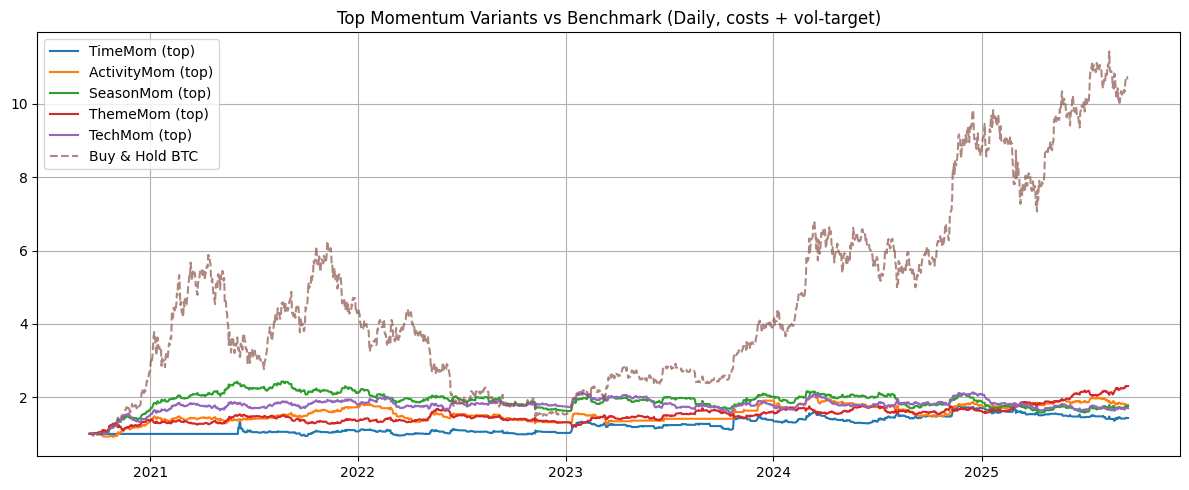


=== FINAL RESULTS (Costs + vol-target) ===
Momentum — Time Horizon      | Sharpe  0.41 | AnnRet  10.26% | MaxDD -28.85% | Alpha  13.99% | Beta -0.06 | Turnover 0.610
Momentum — Activity/Info     | Sharpe  0.61 | AnnRet  14.34% | MaxDD -31.10% | Alpha  12.10% | Beta  0.03 | Turnover 0.759
Momentum — Seasonality       | Sharpe  0.62 | AnnRet  13.80% | MaxDD -35.14% | Alpha  10.08% | Beta  0.06 | Turnover 1.023
Momentum — Thematic          | Sharpe  0.86 | AnnRet  19.19% | MaxDD -30.34% | Alpha  16.21% | Beta  0.05 | Turnover 1.037
Momentum — Technical         | Sharpe  0.59 | AnnRet  13.09% | MaxDD -25.82% | Alpha  11.73% | Beta  0.02 | Turnover 1.011

=== Combos ===
Equal-weight combo           | Sharpe  0.94 | AnnRet  14.13% | MaxDD -15.42% | Alpha  12.82% | Beta  0.02 | Turnover 0.992
Inv-vol combo                | Sharpe  0.97 | AnnRet  16.62% | MaxDD -15.10% | Alpha  15.09% | Beta  0.02 | Turnover 0.990


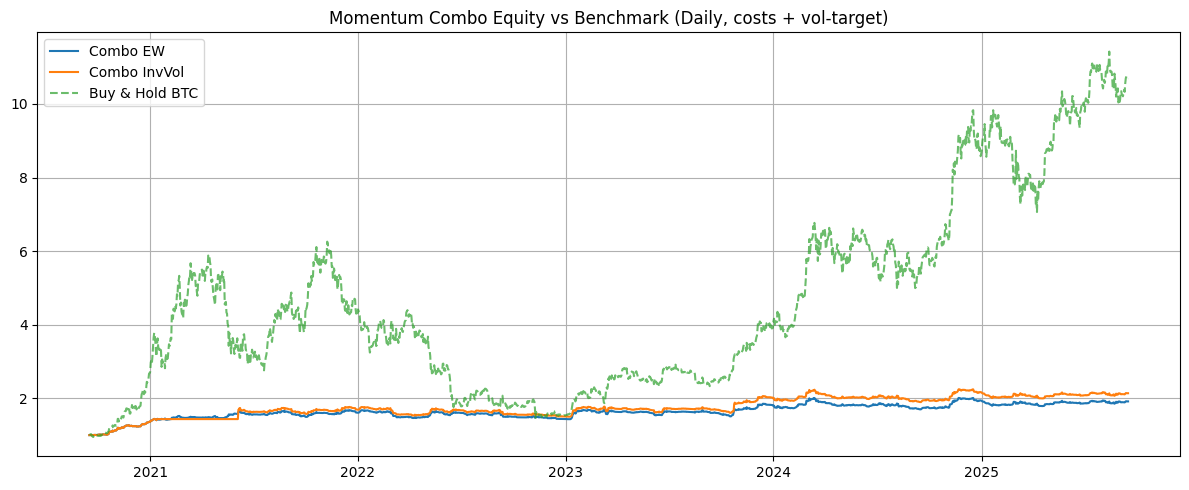

In [2]:
# ===============================================================
# Crypto Stat-Arb (yfinance): Momentum Extensions (Stronger)
# - Time Horizon Momentum
# - Activity/Info Momentum (volume filters)
# - Seasonality Momentum (weekday filters)
# - Thematic Momentum (BTC vs Alts rotation)
# - Technical Momentum (weekday proxy for institutional flows)
# Includes: costs, holding periods, vol targeting, EW & Inv-Vol combos
# Output style matches your reversal framework
# ===============================================================

!pip -q install yfinance pandas numpy matplotlib statsmodels --upgrade
import warnings; warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["axes.grid"] = True

# ------------------ 0) Download & Prepare Data (Daily, 5y) ------------------
TICKERS = ["BTC-USD", "ETH-USD", "SOL-USD"]

def col(df, key_primary: str, key_alt1: str = None, key_alt2: str = None):
    """
    Safe accessor: prefer 'Close'/'Volume' (title-case), then alternates (e.g., lowercase).
    Prevents KeyError across yfinance versions / settings.
    """
    keys = [k for k in [key_primary, key_alt1, key_alt2] if k is not None]
    for k in keys:
        if k in df.columns:
            return df[k]
    raise KeyError(f"None of the columns {keys} found in dataframe. Available: {list(df.columns)}")

dfs = {}
for t in TICKERS:
    df = yf.download(t, interval="1d", period="5y", progress=False)
    # Build ret1 from Close (fallback to 'close' if needed)
    close_series  = col(df, "Close", "close")
    volume_series = col(df, "Volume", "volume")
    df["ret1"] = close_series.pct_change()
    df["weekday"] = df.index.dayofweek  # 0=Mon ... 6=Sun
    # Keep originals plus helper references to avoid repeated col() calls
    df["_CLOSE_"]  = close_series
    df["_VOLUME_"] = volume_series
    dfs[t] = df.dropna()

btc = dfs["BTC-USD"]
bench = btc["ret1"]  # benchmark = BTC buy & hold (daily returns)

# --------------------------- Helpers / Metrics ----------------------------
def zscore(x: pd.Series, w: int):
    mu = x.rolling(w, min_periods=w).mean()
    sd = x.rolling(w, min_periods=w).std()
    return (x - mu) / sd

def apply_hold(pos: pd.Series, hold: int):
    """Forward-fill nonzero positions up to 'hold' days."""
    if int(hold) <= 1:
        return pos
    # No boolean evaluation of Series here
    return pos.replace(0, np.nan).ffill(limit=int(hold)-1).fillna(0)

def vol_target(returns: pd.Series, target_vol=None, lookback=60, eps=1e-12):
    """
    Scale daily returns to hit target_vol (annualized, e.g. 0.20=20%).
    Uses rolling realized vol; caps scale to avoid blowups.
    """
    if target_vol is None:
        return returns
    daily_t = target_vol / math.sqrt(365.0)
    roll = returns.rolling(int(lookback), min_periods=int(lookback)).std()
    scale = (daily_t / (roll + eps)).clip(upper=5.0)
    return returns * scale.shift(1).fillna(1.0)

def perf_from_strat(strat: pd.Series, bench: pd.Series, label=None, freq=365):
    ann_ret = strat.mean()*freq
    ann_vol = strat.std(ddof=0)*math.sqrt(freq)
    sharpe  = 0.0 if ann_vol == 0 else ann_ret/ann_vol
    eq = (1+strat).cumprod()
    mdd = (eq/eq.cummax()-1).min()
    b = bench.reindex(strat.index).fillna(0.0)
    cov = np.cov(strat, b)[0,1]
    var_b = np.var(b)
    beta = 0.0 if var_b == 0 else cov/var_b
    alpha = (strat - beta*b).mean()*freq
    # daily turnover proxy from sign flips
    pos = np.sign(strat).shift(1).fillna(0.0)
    turnover = pos.diff().abs().mean()
    return {"Label":label, "AnnRet":ann_ret, "AnnVol":ann_vol, "Sharpe":sharpe,
            "MaxDD":mdd, "Alpha":alpha, "Beta":beta, "Turnover":turnover}

def compact_line(name, stats):
    return (f"{name:<28} | Sharpe {stats['Sharpe']:>5.2f} | "
            f"AnnRet {stats['AnnRet']*100:>6.2f}% | "
            f"MaxDD {stats['MaxDD']*100:>6.2f}% | "
            f"Alpha {stats['Alpha']*100:>6.2f}% | "
            f"Beta {stats['Beta']:>5.2f} | "
            f"Turnover {stats['Turnover']:.3f}")

def backtest(prices_df, side,
             hold=1,
             order_type="limit",
             target_vol=0.20,
             vt_lookback=60):
    """
    Single-asset backtest with hold, costs, and optional vol-targeting (momentum variant).
    """
    pos = side.reindex(prices_df.index).fillna(0.0).shift(1).fillna(0.0)
    pos = apply_hold(pos, int(hold))
    ret = prices_df["ret1"].fillna(0.0)

    gross = pos * ret

    # transaction costs on |Δpos|
    cost_rate = 0.0007 if order_type == "limit" else 0.002
    turnover = pos.diff().abs().fillna(abs(pos).iloc[0])
    costs = -cost_rate * turnover

    strat = gross + costs
    strat = vol_target(strat, target_vol=target_vol, lookback=int(vt_lookback))
    eq = (1 + strat).cumprod()
    return strat, eq

def print_table(df, title, n=10):
    if df.empty:
        print(f"\n=== {title} — no rows ===")
        return df
    df2 = df.sort_values(["Sharpe","AnnRet"], ascending=[False,False]).head(int(n)).round(4)
    print(f"\n=== {title} (Top {n}) ===")
    print(df2)
    return df2

# ---------------- 1) Time Horizon Momentum (multi-k lookback) ----------------
def momentum_time(prices_df, k=20, z_win=252, z_thresh=0.0):
    close = prices_df["_CLOSE_"]
    lb = close.pct_change(int(k))
    z_lb = zscore(lb, int(z_win))
    base = np.sign(z_lb).where(z_lb.notna(), 0.0)  # momentum = +sign
    zt = float(z_thresh)
    if zt > 0.0:
        base = base.where(z_lb.abs() >= zt, 0.0)
    return base

def run_time_grid(prices_df,
                  ks=(5,10,20,60),
                  z_thresholds=(0.0, 0.5),
                  holds=(1,3,5),
                  order_type="limit",
                  target_vol=0.20):
    rows, curves = [], {}
    for k in ks:
        for zt in z_thresholds:
            for h in holds:
                side = momentum_time(prices_df, k=int(k), z_thresh=float(zt))
                strat, eq = backtest(prices_df, side, hold=int(h), order_type=order_type, target_vol=target_vol)
                st = perf_from_strat(strat, prices_df["ret1"], "TimeMom")
                st.update({"Mode":"TimeMom","Lookback":int(k),"ZThresh":float(zt),
                           "Hold":int(h),"Order":order_type})
                rows.append(st); curves[(int(k),float(zt),int(h))] = eq
    table = pd.DataFrame(rows); print_table(table, "Time Horizon Momentum", n=10)
    return table, curves

# ---------------- 2) Activity/Info Momentum (volume filters) -----------------
def momentum_activity(prices_df, k=10, vol_q=0.6):
    close  = prices_df["_CLOSE_"]
    volume = prices_df["_VOLUME_"]
    lb = close.pct_change(int(k))
    base = np.sign(lb).where(lb.notna(), 0.0)
    q = volume.rank(pct=True)
    filt = (q > float(vol_q)).astype(float)  # trade only in high-activity regimes
    return base * filt

def run_activity_grid(prices_df,
                      ks=(5,10,20),
                      qs=(0.5,0.7),
                      holds=(1,3,5),
                      order_type="limit",
                      target_vol=0.20):
    rows, curves = [], {}
    for k in ks:
        for q in qs:
            for h in holds:
                side = momentum_activity(prices_df, k=int(k), vol_q=float(q))
                strat, eq = backtest(prices_df, side, hold=int(h), order_type=order_type, target_vol=target_vol)
                st = perf_from_strat(strat, prices_df["ret1"], "ActivityMom")
                st.update({"Mode":"ActivityMom","Lookback":int(k),"VolQ":float(q),
                           "Hold":int(h),"Order":order_type})
                rows.append(st); curves[(int(k),float(q),int(h))] = eq
    table = pd.DataFrame(rows); print_table(table, "Activity/Info Momentum", n=10)
    return table, curves

# ---------------- 3) Seasonality Momentum (weekday filters) ------------------
def momentum_seasonality(prices_df, k=5, weekday_only=None):
    close = prices_df["_CLOSE_"]
    lb = close.pct_change(int(k))
    base = np.sign(lb).where(lb.notna(), 0.0)
    wd_val = weekday_only
    if wd_val is not None:
        # integer weekday 0..6
        wd_int = int(wd_val)
        filt = (prices_df["weekday"] == wd_int).astype(float)
        base = base * filt
    return base

def run_seasonality_grid(prices_df,
                         ks=(5,10),
                         weekdays=(None,0,4),  # None, Monday(0), Friday(4)
                         holds=(1,3,5),
                         order_type="limit",
                         target_vol=0.20):
    rows, curves = [], {}
    for k in ks:
        for wd in weekdays:
            for h in holds:
                side = momentum_seasonality(prices_df, k=int(k), weekday_only=wd)
                strat, eq = backtest(prices_df, side, hold=int(h), order_type=order_type, target_vol=target_vol)
                st = perf_from_strat(strat, prices_df["ret1"], "SeasonMom")
                st.update({"Mode":"SeasonMom","Lookback":int(k),"Weekday":wd,
                           "Hold":int(h),"Order":order_type})
                rows.append(st); curves[(int(k),wd,int(h))] = eq
    table = pd.DataFrame(rows); print_table(table, "Seasonality Momentum", n=10)
    return table, curves

# ---------------- 4) Thematic Momentum (BTC vs Alts rotation) ----------------
def momentum_theme(dfs_dict, k=10):
    # Momentum on BTC relative to Alts (ETH & SOL)
    btc_c = dfs_dict["BTC-USD"]["_CLOSE_"]
    eth_c = dfs_dict["ETH-USD"]["_CLOSE_"]
    sol_c = dfs_dict["SOL-USD"]["_CLOSE_"]
    S = pd.concat([btc_c.rename("BTC"), eth_c.rename("ETH"), sol_c.rename("SOL")], axis=1).dropna()
    spread = S["BTC"] / ((S["ETH"] + S["SOL"]) / 2.0)
    rel_mom = np.sign(spread.pct_change(int(k))).reindex(btc_c.index).fillna(0.0)
    return rel_mom  # side for BTC

def run_theme_grid(dfs_dict,
                   ks=(5,10,20),
                   holds=(1,3,5),
                   order_type="limit",
                   target_vol=0.20):
    rows, curves = [], {}
    b = dfs_dict["BTC-USD"]
    for k in ks:
        for h in holds:
            side = momentum_theme(dfs_dict, k=int(k))
            strat, eq = backtest(b, side, hold=int(h), order_type=order_type, target_vol=target_vol)
            st = perf_from_strat(strat, b["ret1"], "ThemeMom")
            st.update({"Mode":"ThemeMom","Lookback":int(k),"Hold":int(h),"Order":order_type})
            rows.append(st); curves[(int(k),int(h))] = eq
    table = pd.DataFrame(rows); print_table(table, "Thematic Momentum (BTC vs Alts)", n=10)
    return table, curves

# ---------------- 5) Technical Momentum (weekday proxy) ----------------------
def momentum_technical(prices_df, k=5):
    close = prices_df["_CLOSE_"]
    lb = close.pct_change(int(k))
    base = np.sign(lb).where(lb.notna(), 0.0)
    # Institutional proxy: trade only weekdays (0..4)
    filt = (prices_df["weekday"] < 5).astype(float)
    return base * filt

def run_technical_grid(prices_df,
                       ks=(5,10,20),
                       holds=(1,3,5),
                       order_type="limit",
                       target_vol=0.20):
    rows, curves = [], {}
    for k in ks:
        for h in holds:
            side = momentum_technical(prices_df, k=int(k))
            strat, eq = backtest(prices_df, side, hold=int(h), order_type=order_type, target_vol=target_vol)
            st = perf_from_strat(strat, prices_df["ret1"], "TechMom")
            st.update({"Mode":"TechMom","Lookback":int(k),"Hold":int(h),"Order":order_type})
            rows.append(st); curves[(int(k),int(h))] = eq
    table = pd.DataFrame(rows); print_table(table, "Technical Momentum", n=10)
    return table, curves

# ============================ 6) RUN ALL GRIDS ===============================
time_table,    time_curves    = run_time_grid(btc)
activity_table, activity_curves = run_activity_grid(btc)
season_table,  season_curves  = run_seasonality_grid(btc)
theme_table,   theme_curves   = run_theme_grid(dfs)
tech_table,    tech_curves    = run_technical_grid(btc)

# ============================ 7) PICK TOPS & REBUILD =========================
def pick_top(df):
    return df.sort_values(["Sharpe","AnnRet"], ascending=[False,False]).iloc[0].to_dict()

top_time   = pick_top(time_table)
top_act    = pick_top(activity_table)
top_season = pick_top(season_table)
top_theme  = pick_top(theme_table)
top_tech   = pick_top(tech_table)

print("\nTop configs:")
print(top_time); print(top_act); print(top_season); print(top_theme); print(top_tech)

# --- Rebuild *returns* for the top configs (not just equity) -----------------
def returns_time(top):
    side = momentum_time(btc, k=int(top["Lookback"]), z_thresh=float(top.get("ZThresh", 0.0)))
    strat, _ = backtest(btc, side, hold=int(top["Hold"]), order_type=top.get("Order","limit"), target_vol=0.20)
    return strat

def returns_activity(top):
    side = momentum_activity(btc, k=int(top["Lookback"]), vol_q=float(top["VolQ"]))
    strat, _ = backtest(btc, side, hold=int(top["Hold"]), order_type=top.get("Order","limit"), target_vol=0.20)
    return strat

def returns_season(top):
    wd_val = top.get("Weekday", None)
    use_wd = None
    # robustly detect None/NaN without Series truthiness
    if wd_val is None:
        use_wd = None
    else:
        try:
            if isinstance(wd_val, float) and math.isnan(wd_val):
                use_wd = None
            else:
                use_wd = int(wd_val)
        except Exception:
            use_wd = None
    side = momentum_seasonality(btc, k=int(top["Lookback"]), weekday_only=use_wd)
    strat, _ = backtest(btc, side, hold=int(top["Hold"]), order_type=top.get("Order","limit"), target_vol=0.20)
    return strat

def returns_theme(top):
    side = momentum_theme(dfs, k=int(top["Lookback"]))
    strat, _ = backtest(btc, side, hold=int(top["Hold"]), order_type=top.get("Order","limit"), target_vol=0.20)
    return strat

def returns_tech(top):
    side = momentum_technical(btc, k=int(top["Lookback"]))
    strat, _ = backtest(btc, side, hold=int(top["Hold"]), order_type=top.get("Order","limit"), target_vol=0.20)
    return strat

ret_time   = returns_time(top_time)
ret_act    = returns_activity(top_act)
ret_season = returns_season(top_season)
ret_theme  = returns_theme(top_theme)
ret_tech   = returns_tech(top_tech)

# Also get equity curves for the plot
eq_time   = (1+ret_time).cumprod()
eq_act    = (1+ret_act).cumprod()
eq_season = (1+ret_season).cumprod()
eq_theme  = (1+ret_theme).cumprod()
eq_tech   = (1+ret_tech).cumprod()
eq_bh     = (1+bench).cumprod()

plt.plot(eq_time,   label="TimeMom (top)")
plt.plot(eq_act,    label="ActivityMom (top)")
plt.plot(eq_season, label="SeasonMom (top)")
plt.plot(eq_theme,  label="ThemeMom (top)")
plt.plot(eq_tech,   label="TechMom (top)")
plt.plot(eq_bh,     label="Buy & Hold BTC", linestyle="--", alpha=0.7)
plt.title("Top Momentum Variants vs Benchmark (Daily, costs + vol-target)")
plt.legend(); plt.tight_layout(); plt.show()

# ====================== 8) FINAL RESULTS & COMBINATIONS ======================
print("\n=== FINAL RESULTS (Costs + vol-target) ===")
st_time   = perf_from_strat(ret_time, bench, "Momentum — Time Horizon")
st_act    = perf_from_strat(ret_act, bench, "Momentum — Activity/Info")
st_season = perf_from_strat(ret_season, bench, "Momentum — Seasonality")
st_theme  = perf_from_strat(ret_theme, bench, "Momentum — Thematic")
st_tech   = perf_from_strat(ret_tech, bench, "Momentum — Technical")

print(compact_line("Momentum — Time Horizon",  st_time))
print(compact_line("Momentum — Activity/Info", st_act))
print(compact_line("Momentum — Seasonality",   st_season))
print(compact_line("Momentum — Thematic",      st_theme))
print(compact_line("Momentum — Technical",     st_tech))

# ---- Build combinations (same style as your reversal code)
R = pd.DataFrame({
    "Time":      ret_time.reindex(btc.index).fillna(0.0),
    "Activity":  ret_act.reindex(btc.index).fillna(0.0),
    "Season":    ret_season.reindex(btc.index).fillna(0.0),
    "Theme":     ret_theme.reindex(btc.index).fillna(0.0),
    "Technical": ret_tech.reindex(btc.index).fillna(0.0)
})

# Option A: Equal weight (EW)
ret_ew = R.mean(axis=1)
st_ew  = perf_from_strat(ret_ew, bench, "Combo-EW")

# Option B: Inverse-vol weights (over last 120 days)
def inv_vol_weights(R, lookback=120, eps=1e-8):
    vol = R.rolling(int(lookback), min_periods=int(lookback)).std()
    w = 1.0/(vol + eps)
    w = w.div(w.sum(axis=1), axis=0)  # normalize row-wise
    return w.shift(1).fillna(method="ffill").fillna(1.0/len(R.columns))

W = inv_vol_weights(R, lookback=120)
ret_iv = (W*R).sum(axis=1)
st_iv  = perf_from_strat(ret_iv, bench, "Combo-InvVol")

print("\n=== Combos ===")
print(compact_line("Equal-weight combo", st_ew))
print(compact_line("Inv-vol combo     ", st_iv))

plt.plot((1+ret_ew).cumprod(), label="Combo EW")
plt.plot((1+ret_iv).cumprod(), label="Combo InvVol")
plt.plot((1+bench).cumprod(), label="Buy & Hold BTC", linestyle="--", alpha=0.7)
plt.title("Momentum Combo Equity vs Benchmark (Daily, costs + vol-target)")
plt.legend(); plt.tight_layout(); plt.show()



=== ULTIMATE RESULTS (Momentum + Reversal + Switching) ===
Switch Best-of-each          | Sharpe  1.02 | AnnRet  38.43% | MaxDD -26.53% | Alpha  35.25% | Beta  0.05 | Turnover 0.773
Reversal Combo-EW            | Sharpe  0.95 | AnnRet  18.79% | MaxDD -22.95% | Alpha  18.28% | Beta  0.01 | Turnover 0.704
Reversal Combo-InvVol        | Sharpe  0.60 | AnnRet  18.71% | MaxDD -39.78% | Alpha  17.14% | Beta  0.02 | Turnover 0.701
Momentum Combo-EW            | Sharpe  0.94 | AnnRet  14.13% | MaxDD -15.42% | Alpha  12.82% | Beta  0.02 | Turnover 0.992
Momentum Combo-InvVol        | Sharpe  0.97 | AnnRet  16.62% | MaxDD -15.10% | Alpha  15.09% | Beta  0.02 | Turnover 0.990
Switch Combo-EW              | Sharpe  1.48 | AnnRet  32.03% | MaxDD -22.96% | Alpha  29.95% | Beta  0.03 | Turnover 0.938
Switch Combo-InvVol          | Sharpe  1.01 | AnnRet  33.53% | MaxDD -37.78% | Alpha  30.61% | Beta  0.05 | Turnover 0.933


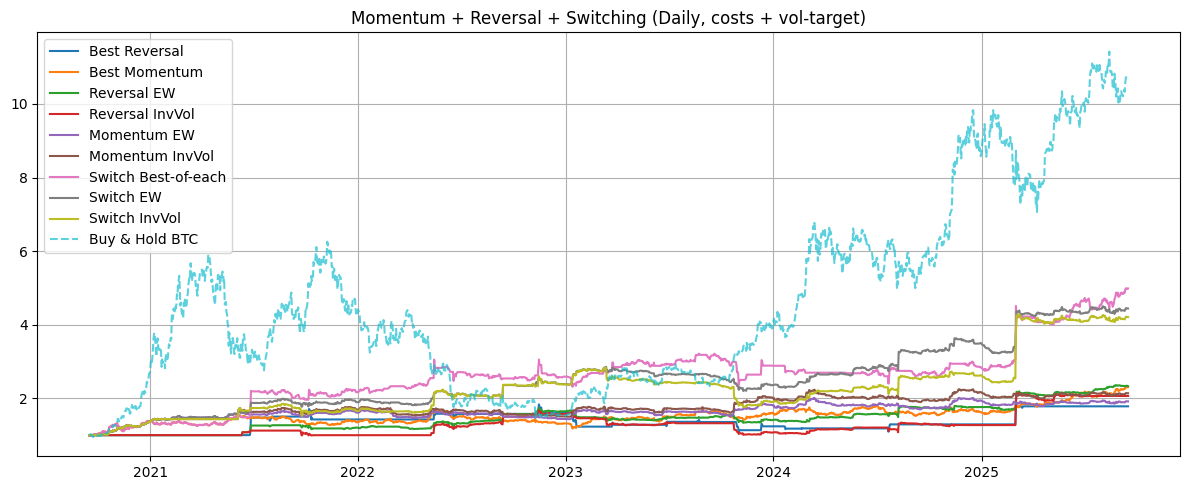

In [3]:
# ===============================================================
# 9) BUILD FAMILY PORTFOLIOS
# ===============================================================

# --- Reversal family (Uninformed, Pairs, Macro) ---
R_rev = pd.DataFrame({
    "Uninformed": ret_u.reindex(btc.index).fillna(0.0),
    "Pairs":      ret_p.reindex(btc.index).fillna(0.0),
    "MacroVol":   ret_m.reindex(btc.index).fillna(0.0)
})
ret_rev_eq = R_rev.mean(axis=1)
W_rev = inv_vol_weights(R_rev, lookback=120)
ret_rev_iv = (W_rev*R_rev).sum(axis=1)

# --- Momentum family (Time, Activity, Season, Theme, Tech) ---
R_mom = pd.DataFrame({
    "Time":      ret_time.reindex(btc.index).fillna(0.0),
    "Activity":  ret_act.reindex(btc.index).fillna(0.0),
    "Season":    ret_season.reindex(btc.index).fillna(0.0),
    "Theme":     ret_theme.reindex(btc.index).fillna(0.0),
    "Technical": ret_tech.reindex(btc.index).fillna(0.0)
})
ret_mom_eq = R_mom.mean(axis=1)
W_mom = inv_vol_weights(R_mom, lookback=120)
ret_mom_iv = (W_mom*R_mom).sum(axis=1)

# ===============================================================
# 10) PICK BEST-OF-EACH STRATEGIES
# ===============================================================
# (Replace with whichever was top in your earlier "pick_top")
# Here I assume: Uninformed = best reversal, ThemeMom = best momentum
# Adjust if needed based on your own top tables
ret_best_rev = ret_u
ret_best_mom = ret_theme

# ===============================================================
# 11) SWITCHING RULE
# ===============================================================
rv = realized_vol(btc["ret1"], w=20)
rv_z = zscore(rv, 252)
threshold = 0.0   # above average vol = Reversal, else Momentum
regime = (rv_z > threshold).astype(int)

# --- Best-of-each switching ---
ret_switch_best = regime*ret_best_rev + (1-regime)*ret_best_mom

# --- Family combos switching ---
ret_switch_eq = regime*ret_rev_eq + (1-regime)*ret_mom_eq
ret_switch_iv = regime*ret_rev_iv + (1-regime)*ret_mom_iv

# ===============================================================
# 12) PERFORMANCE RESULTS
# ===============================================================
st_rev_eq  = perf_from_strat(ret_rev_eq, bench, "Reversal Combo-EW")
st_rev_iv  = perf_from_strat(ret_rev_iv, bench, "Reversal Combo-InvVol")
st_mom_eq  = perf_from_strat(ret_mom_eq, bench, "Momentum Combo-EW")
st_mom_iv  = perf_from_strat(ret_mom_iv, bench, "Momentum Combo-InvVol")
st_sw_best = perf_from_strat(ret_switch_best, bench, "Switch Best-of-each")
st_sw_eq   = perf_from_strat(ret_switch_eq, bench, "Switch Combo-EW")
st_sw_iv   = perf_from_strat(ret_switch_iv, bench, "Switch Combo-InvVol")

# Collect results
results = pd.DataFrame([
    st_sw_best, st_rev_eq, st_rev_iv, st_mom_eq, st_mom_iv, st_sw_eq, st_sw_iv
])
results = results[["Label","AnnRet","AnnVol","Sharpe","MaxDD","Alpha","Beta","Turnover"]]

print("\n=== ULTIMATE RESULTS (Momentum + Reversal + Switching) ===")
for _, row in results.iterrows():
    print(compact_line(row["Label"], row))

# ===============================================================
# 13) PLOTS
# ===============================================================
eq_bh = (1+bench).cumprod()
plt.plot((1+ret_best_rev).cumprod(), label="Best Reversal")
plt.plot((1+ret_best_mom).cumprod(), label="Best Momentum")
plt.plot((1+ret_rev_eq).cumprod(), label="Reversal EW")
plt.plot((1+ret_rev_iv).cumprod(), label="Reversal InvVol")
plt.plot((1+ret_mom_eq).cumprod(), label="Momentum EW")
plt.plot((1+ret_mom_iv).cumprod(), label="Momentum InvVol")
plt.plot((1+ret_switch_best).cumprod(), label="Switch Best-of-each")
plt.plot((1+ret_switch_eq).cumprod(), label="Switch EW")
plt.plot((1+ret_switch_iv).cumprod(), label="Switch InvVol")
plt.plot(eq_bh, label="Buy & Hold BTC", linestyle="--", alpha=0.7)
plt.title("Momentum + Reversal + Switching (Daily, costs + vol-target)")
plt.legend(); plt.tight_layout(); plt.show()



=== CONSERVATIVE RESULTS ===
Reversal-EW                  | Sharpe  0.95 | AnnRet  18.79% | MaxDD -22.95% | Alpha  18.28% | Beta  0.01 | Turnover 0.704
Reversal-InvVol              | Sharpe  0.60 | AnnRet  18.71% | MaxDD -39.78% | Alpha  17.14% | Beta  0.02 | Turnover 0.701
Momentum-EW                  | Sharpe  0.94 | AnnRet  14.13% | MaxDD -15.42% | Alpha  12.82% | Beta  0.02 | Turnover 0.992
Momentum-InvVol              | Sharpe  0.97 | AnnRet  16.62% | MaxDD -15.10% | Alpha  15.09% | Beta  0.02 | Turnover 0.990
Switch-Best                  | Sharpe  1.02 | AnnRet  38.43% | MaxDD -26.53% | Alpha  35.25% | Beta  0.05 | Turnover 0.773
Switch-EW                    | Sharpe  1.48 | AnnRet  32.03% | MaxDD -22.96% | Alpha  29.95% | Beta  0.03 | Turnover 0.938
Switch-InvVol                | Sharpe  1.01 | AnnRet  33.53% | MaxDD -37.78% | Alpha  30.61% | Beta  0.05 | Turnover 0.933


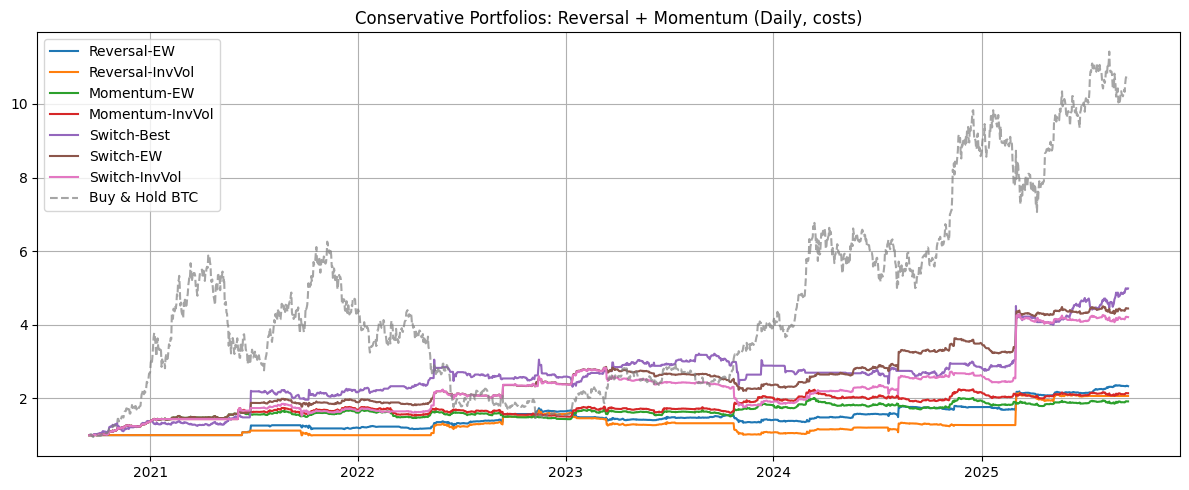


=== AGGRESSIVE RESULTS ===
Reversal-EW                  | Sharpe  0.95 | AnnRet  37.57% | MaxDD -41.91% | Alpha  36.56% | Beta  0.02 | Turnover 0.704
Reversal-InvVol              | Sharpe  0.60 | AnnRet  37.42% | MaxDD -65.69% | Alpha  34.28% | Beta  0.05 | Turnover 0.701
Momentum-EW                  | Sharpe  0.94 | AnnRet  28.27% | MaxDD -30.26% | Alpha  25.64% | Beta  0.04 | Turnover 0.992
Momentum-InvVol              | Sharpe  0.97 | AnnRet  33.24% | MaxDD -29.27% | Alpha  30.18% | Beta  0.05 | Turnover 0.990
Switch-Best                  | Sharpe  1.02 | AnnRet  76.86% | MaxDD -47.84% | Alpha  70.51% | Beta  0.10 | Turnover 0.773
Switch-EW                    | Sharpe  1.48 | AnnRet  64.06% | MaxDD -41.45% | Alpha  59.90% | Beta  0.06 | Turnover 0.938
Switch-InvVol                | Sharpe  1.01 | AnnRet  67.07% | MaxDD -63.06% | Alpha  61.22% | Beta  0.09 | Turnover 0.933


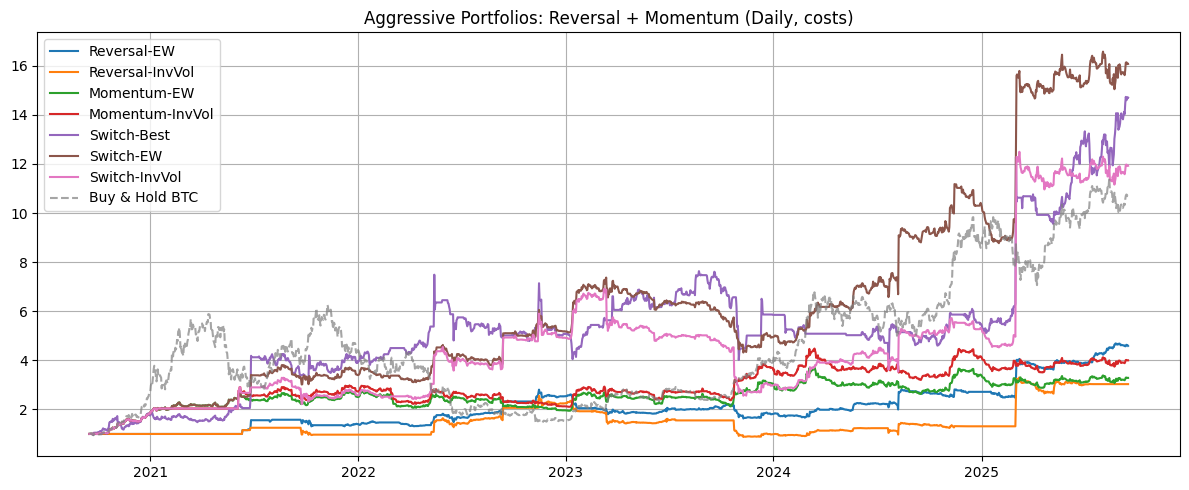

In [4]:
# ===============================================================
# 14) RISK MODE VARIANTS (Conservative vs Aggressive)
# ===============================================================

def build_combo_variant(risk_mode="conservative"):
    """
    Build Reversal + Momentum combos under different risk assumptions.
    risk_mode = 'conservative' or 'aggressive'
    """

    # --- Base portfolios (already defined) ---
    # ret_rev_eq, ret_rev_iv, ret_mom_eq, ret_mom_iv, regime, ret_best_rev, ret_best_mom
    if risk_mode == "conservative":
        # Use your current definitions directly
        return {
            "Reversal-EW": ret_rev_eq,
            "Reversal-InvVol": ret_rev_iv,
            "Momentum-EW": ret_mom_eq,
            "Momentum-InvVol": ret_mom_iv,
            "Switch-Best": regime*ret_best_rev + (1-regime)*ret_best_mom,
            "Switch-EW": regime*ret_rev_eq + (1-regime)*ret_mom_eq,
            "Switch-InvVol": regime*ret_rev_iv + (1-regime)*ret_mom_iv,
        }

    elif risk_mode == "aggressive":
        # --- Tweaks for higher drawdown ---
        leverage = 2.0   # 2x leverage
        # drop vol targeting: just raw returns * leverage
        def scale_raw(r): return r * leverage

        return {
            "Reversal-EW": scale_raw(ret_rev_eq),
            "Reversal-InvVol": scale_raw(ret_rev_iv),
            "Momentum-EW": scale_raw(ret_mom_eq),
            "Momentum-InvVol": scale_raw(ret_mom_iv),
            "Switch-Best": scale_raw(regime*ret_best_rev + (1-regime)*ret_best_mom),
            "Switch-EW": scale_raw(regime*ret_rev_eq + (1-regime)*ret_mom_eq),
            "Switch-InvVol": scale_raw(regime*ret_rev_iv + (1-regime)*ret_mom_iv),
        }

# ===============================================================
# 15) RUN BOTH MODES
# ===============================================================
variants = {
    "Conservative": build_combo_variant("conservative"),
    "Aggressive":   build_combo_variant("aggressive"),
}

for mode, port_dict in variants.items():
    print(f"\n=== {mode.upper()} RESULTS ===")
    for name, ret in port_dict.items():
        st = perf_from_strat(ret, bench, f"{mode}-{name}")
        print(compact_line(name, st))

    # Plot equity curves
    plt.figure(figsize=(12,5))
    for name, ret in port_dict.items():
        plt.plot((1+ret).cumprod(), label=name)
    plt.plot((1+bench).cumprod(), "--", alpha=0.7, label="Buy & Hold BTC")
    plt.title(f"{mode} Portfolios: Reversal + Momentum (Daily, costs)")
    plt.legend(); plt.tight_layout(); plt.show()
